In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('price2.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte


# encoding='CP949'=한글

In [3]:
# 파일의 한글때문에 인코딩 문제임을 알수 있음  
## 인코딩이슈가 발생할 때에는 인코딩을 직접지정해줌

df = pd.read_csv("price2.csv", encoding='CP949')
# . ,구분확실히 하기

In [4]:
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [5]:
df.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
6285,제주,모든면적,2021,11,"6,860"
6286,제주,전용면적 60제곱미터이하,2021,11,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787"
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924"
6289,제주,전용면적 102제곱미터초과,2021,11,"6,815"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6290 non-null   object
 1   규모구분        6290 non-null   object
 2   연도          6290 non-null   int64 
 3   월           6290 non-null   int64 
 4   분양가격(제곱미터)  5812 non-null   object
dtypes: int64(2), object(3)
memory usage: 245.8+ KB


In [7]:
df.shape

(6290, 5)

# 컬럼명 변경 함수' rename '사용

In [8]:

df = df.rename(columns={'분양가격(제곱미터)':'price'})
df

,지역명,규모구분,연도,월,price
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
6285,제주,모든면적,2021,11,"6,860"
6286,제주,전용면적 60제곱미터이하,2021,11,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787"
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924"


In [9]:
#특정컬럼의 데이터만 읽어오고싶다면
df[['지역명','price']]
#파이썬에서는 '', "" 동일하게 작동함

,지역명,price
0,서울,5841
1,서울,5652
2,서울,5882
3,서울,5721
4,서울,5879
...,...,...
6285,제주,"6,860"
6286,제주,NaN
6287,제주,"6,787"
6288,제주,"5,924"


In [10]:
#기술통계분석
df.describe()

,연도,월
count,6290.000000,6290.000000
mean,2018.324324,6.608108
std,1.794338,3.467565
min,2015.000000,1.000000
25%,2017.000000,4.000000
50%,2018.000000,7.000000
75%,2020.000000,10.000000
max,2021.000000,12.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     6290 non-null   object
 1   규모구분    6290 non-null   object
 2   연도      6290 non-null   int64 
 3   월       6290 non-null   int64 
 4   price   5812 non-null   object
dtypes: int64(2), object(3)
memory usage: 245.8+ KB


In [12]:
#분양가격을 숫자타입으로 바꿈
df['price'].astype(int)

ValueError: invalid literal for int() with base 10: '  '

#  str.strip /  replace

In [13]:
# 오류코트 ValueError: invalid literal for int() with base 10: '  ' 
## = 데이터 내에 공백때문에 소수를 정수로 변환할 수 없다는 메세지
### 공백없애기
df['price'] = df['price'].str.strip()
# str(글자).strip(공백삭제)
## 함수사용한 결과를 저장하기 위해서는 항상 df에 '='대입시켜줌 
# . ,구분확실히 하기

In [14]:
# 스트립으로 '  ' 이 ''으로 바뀌었으니 없는값의 row를 불러와보기
df.loc[df['price'] == '']

,지역명,규모구분,연도,월,price
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,
29,광주,전용면적 102제곱미터초과,2015,10,
34,대전,전용면적 102제곱미터초과,2015,10,
81,제주,전용면적 60제곱미터이하,2015,10,
113,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,11,
114,광주,전용면적 102제곱미터초과,2015,11,
119,대전,전용면적 102제곱미터초과,2015,11,
166,제주,전용면적 60제곱미터이하,2015,11,
198,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,12,
199,광주,전용면적 102제곱미터초과,2015,12,


In [15]:
# 위의 공란을 0으로 바꿔주기
df.loc[df['price'] == '','price'] = 0

In [16]:
# 대입 결과확인
df.loc[df['price'] == 0]

,지역명,규모구분,연도,월,price
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,0
29,광주,전용면적 102제곱미터초과,2015,10,0
34,대전,전용면적 102제곱미터초과,2015,10,0
81,제주,전용면적 60제곱미터이하,2015,10,0
113,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,11,0
114,광주,전용면적 102제곱미터초과,2015,11,0
119,대전,전용면적 102제곱미터초과,2015,11,0
166,제주,전용면적 60제곱미터이하,2015,11,0
198,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,12,0
199,광주,전용면적 102제곱미터초과,2015,12,0


In [17]:
# 이로써 원본데이터의  가격이 모두 숫자로 바꼈으니 정수로 바꿔봄
df['price'].astype(int)

ValueError: cannot convert float NaN to integer

In [18]:
#하지만 우리가 인지하지 못한 결측값=NaN  존재. 
#결측값도 0으로 처리 'fillna'
df['price'] = df['price'].fillna(0)

In [19]:
# 대입 결과확인
df.loc[df['price'] == 0]

,지역명,규모구분,연도,월,price
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,0
29,광주,전용면적 102제곱미터초과,2015,10,0
34,대전,전용면적 102제곱미터초과,2015,10,0
81,제주,전용면적 60제곱미터이하,2015,10,0
113,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,11,0
...,...,...,...,...,...
6238,대전,전용면적 85제곱미터초과 102제곱미터이하,2021,11,0
6239,대전,전용면적 102제곱미터초과,2021,11,0
6244,울산,전용면적 102제곱미터초과,2021,11,0
6273,전남,전용면적 85제곱미터초과 102제곱미터이하,2021,11,0


In [20]:
# 다시 정수로 바꿔봄
df['price'].astype(int)

ValueError: invalid literal for int() with base 10: '9,501'

In [21]:
#에러해석= 숫자사이에 , 를 텍스트로 인식해서 소숫잠->정수 변환실패
# 쉼표를 날리기 위해 9,501의 위치를 우선파악
df.loc[df['price'] == '9,501']

,지역명,규모구분,연도,월,price
6035,서울,모든면적,2021,9,"9,501"


In [22]:
## str(글자).strip(공백삭제) / 지정글자를 찾아 바꾸기 replace
df['price'] = df['price'].str.replace(',','')
df.iloc[6035:6239]

,지역명,규모구분,연도,월,price
6035,서울,모든면적,2021,9,9501
6036,서울,전용면적 60제곱미터이하,2021,9,9724
6037,서울,전용면적 60제곱미터초과 85제곱미터이하,2021,9,9518
6038,서울,전용면적 85제곱미터초과 102제곱미터이하,2021,9,7044
6039,서울,전용면적 102제곱미터초과,2021,9,NaN
...,...,...,...,...,...
6234,광주,전용면적 102제곱미터초과,2021,11,4987
6235,대전,모든면적,2021,11,3743
6236,대전,전용면적 60제곱미터이하,2021,11,3890
6237,대전,전용면적 60제곱미터초과 85제곱미터이하,2021,11,3742


In [23]:
df['price'] = df['price'].fillna(0)
df.loc[df['price'] == 0]

,지역명,규모구분,연도,월,price
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,0
29,광주,전용면적 102제곱미터초과,2015,10,0
34,대전,전용면적 102제곱미터초과,2015,10,0
81,제주,전용면적 60제곱미터이하,2015,10,0
113,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,11,0
...,...,...,...,...,...
6238,대전,전용면적 85제곱미터초과 102제곱미터이하,2021,11,0
6239,대전,전용면적 102제곱미터초과,2021,11,0
6244,울산,전용면적 102제곱미터초과,2021,11,0
6273,전남,전용면적 85제곱미터초과 102제곱미터이하,2021,11,0


In [24]:
# 마침내 소수->정수로 변경
df['price'] = df['price'].astype(int) 

In [25]:
#기술통계
df.describe()

,연도,월,price
count,6290.000000,6290.000000,6290.000000
mean,2018.324324,6.608108,3196.782194
std,1.794338,3.467565,1660.120551
min,2015.000000,1.000000,0.000000
25%,2017.000000,4.000000,2444.000000
50%,2018.000000,7.000000,2972.000000
75%,2020.000000,10.000000,3865.750000
max,2021.000000,12.000000,13835.000000


In [26]:
df.shape

(6290, 5)

In [27]:
df.head()

,지역명,규모구분,연도,월,price
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [28]:
#규모구분에 잇는 값 중 '전용면적'이라는 단어삭제해보자
df['규모구분'] = df['규모구분'].str.replace('전용면적','')
df.head()

,지역명,규모구분,연도,월,price
0,서울,모든면적,2015,10,5841
1,서울,60제곱미터이하,2015,10,5652
2,서울,60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,102제곱미터초과,2015,10,5879


# groupby

In [29]:
df = df.rename(columns={'연도':'year'})

In [30]:
df.groupby('year')['price'].mean()

year
2015    2657.474510
2016    2830.688235
2017    3004.636275
2018    2997.517647
2019    3302.353922
2020    3416.747059
2021    3815.103743
Name: price, dtype: float64

In [31]:
df = df.rename(columns={'지역명':'city'})
df.groupby('city')['price'].mean()
#mean()의 경우 수소이기 때문에 반드시 괄호 붙여야함

city
강원    2530.624324
경기    4182.824324
경남    2903.781081
경북    2577.529730
광주    2820.089189
대구    3866.497297
대전    2365.810811
부산    3814.151351
서울    7581.737838
세종    2677.886486
울산    2239.132432
인천    3895.659459
전남    2423.443243
전북    2412.329730
제주    3193.627027
충남    2473.178378
충북    2386.994595
Name: price, dtype: float64

In [32]:
# 규모구분대비 분양가격의 평균
df.groupby('규모구분')['price'].mean()

규모구분
 102제곱미터초과             3307.278219
 60제곱미터이하              3149.135930
 60제곱미터초과 85제곱미터이하     3312.965819
 85제곱미터초과 102제곱미터이하    2887.731320
모든면적                   3326.799682
Name: price, dtype: float64

In [33]:
#전체평균
df['price'].mean()

3196.7821939586647

In [34]:
#분양가격 중 100만원 이하로 입력된건 오입력으로 간주
## 100이하의 데이터는 삭제
### 원본데이터를 토대로 변수 idx 를 생성하여 idx 에서 drop적용하여 가공
idx = df.loc[df['price'] < 100 ].index
idx

Int64Index([  28,   29,   34,   81,  113,  114,  119,  166,  198,  199,
            ...
            6159, 6188, 6201, 6209, 6233, 6238, 6239, 6244, 6273, 6286],
           dtype='int64', length=509)

In [35]:
#분양가 100 이하인 것들 출력됨.
df.loc[idx]

,city,규모구분,year,월,price
28,광주,85제곱미터초과 102제곱미터이하,2015,10,0
29,광주,102제곱미터초과,2015,10,0
34,대전,102제곱미터초과,2015,10,0
81,제주,60제곱미터이하,2015,10,0
113,광주,85제곱미터초과 102제곱미터이하,2015,11,0
...,...,...,...,...,...
6238,대전,85제곱미터초과 102제곱미터이하,2021,11,0
6239,대전,102제곱미터초과,2021,11,0
6244,울산,102제곱미터초과,2021,11,0
6273,전남,85제곱미터초과 102제곱미터이하,2021,11,0


In [36]:
#위의 결과의 0 인덱스들을 drop시키는  데이터사본 "df2" 생성 
df2 = df.drop(idx,axis=0)
df2

,city,규모구분,year,월,price
0,서울,모든면적,2015,10,5841
1,서울,60제곱미터이하,2015,10,5652
2,서울,60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,102제곱미터초과,2015,10,5879
...,...,...,...,...,...
6284,경남,102제곱미터초과,2021,11,3476
6285,제주,모든면적,2021,11,6860
6287,제주,60제곱미터초과 85제곱미터이하,2021,11,6787
6288,제주,85제곱미터초과 102제곱미터이하,2021,11,5924


In [37]:
#df와 df2 describe비교
df2.describe()

,year,월,price
count,5781.000000,5781.000000,5781.000000
mean,2018.277115,6.606124,3478.249438
std,1.807714,3.472137,1421.097202
min,2015.000000,1.000000,1868.000000
25%,2017.000000,4.000000,2583.000000
50%,2018.000000,7.000000,3082.000000
75%,2020.000000,10.000000,3931.000000
max,2021.000000,12.000000,13835.000000


In [38]:
# df2의 연도별 지역별 분양가격 평균
df2.groupby(['year','city'])['price'].mean()

year  city
2015  강원      2178.200000
      경기      3351.800000
      경남      2563.400000
      경북      2261.866667
      광주      2399.000000
                 ...     
2021  전남      3018.705882
      전북      2728.814815
      제주      6904.837838
      충남      2966.452830
      충북      2668.345455
Name: price, Length: 119, dtype: float64

In [39]:
#반대로도 가능
df2.groupby(['city','year'])['price'].mean()

city  year
강원    2015    2178.200000
      2016    2170.576923
      2017    2217.833333
      2018    2490.683333
      2019    2707.416667
                 ...     
충북    2017    2261.383333
      2018    2469.483333
      2019    2415.416667
      2020    2533.017241
      2021    2668.345455
Name: price, Length: 119, dtype: float64

In [40]:
# 정제한 데이터를 파일로 다운
data = pd.DataFrame(df2)
data.to_csv('data.csv')

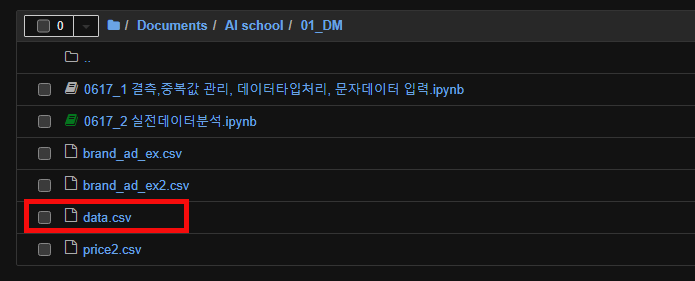

In [41]:
#위 명령결과확인하면
from IPython.display import Image 
Image('result.png') 
#아래사진처럼 상위파일경로에 생성되어있음을 알 수 있음

# *정제한 데이터 파일로 변환 후 엑셀에서 열어봤을때 한글이 깨진다면
파일오픈->[데이터]탭->[텍스트/csv에서]클릭->[데이터가져오기]창 뜨면 깨진파일 불러오기->[데이터변환]클릭-> '파워쿼리'생성

In [42]:
#참고
#분양가격별로 내림차순
df3=pd.DataFrame(df2.groupby('city').mean())
df3.head()

,year,월,price
city,,,
강원,2018.357542,6.656425,2615.449721
경기,2018.324324,6.608108,4182.824324
경남,2018.290859,6.628809,2976.174515
경북,2018.281609,6.649425,2740.477011
광주,2018.362460,6.614887,3376.805825


In [43]:
# 분양가 높은지역을 출력해보자
df3= df3.sort_values(by='price',ascending=False)#오름차순은 true
df3['price']

city
서울    7685.597260
경기    4182.824324
제주    3965.241611
대구    3962.891967
인천    3938.234973
부산    3814.151351
울산    3423.466942
광주    3376.805825
대전    3206.410256
세종    3145.453968
경남    2976.174515
경북    2740.477011
강원    2615.449721
충남    2607.054131
전남    2490.761111
전북    2438.693989
충북    2399.967391
Name: price, dtype: float64